In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Models.grid_search_utils import GridSearch as Gs
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
    

In [2]:
LGBMRanker = Gs.load_model(name="../Models/BlackBox/lmart/saved_models/LGBMRanker")
FIGSReg = Gs.load_model(name="../Models/WhiteBox/figs/saved_models/FIGSReg")
EBMReg = Gs.load_model(name="../Models/WhiteBox/ebm/saved_models/EBMReg")
test_set = pd.read_json("../outputs/scores/0_dataset_ts.json")

In [3]:
job = test_set[test_set["qId"]==84].copy()

output_lgmb = LGBMRanker.predict(job.iloc[:,5:].to_numpy())
output_ebm = EBMReg.predict(job.iloc[:,5:].to_numpy())
output_figs = FIGSReg.predict(job.iloc[:,5:].to_numpy())

rank_w_score = pd.DataFrame(job["relevance"].values, index=job.index, columns=["pred"])
rank_w_score = rank_w_score.sort_values(by="pred", ascending=False).head(10)
rank_w_score["rank"] = rank_w_score["pred"].rank(method="first")
rank_w_score["ax"] = 0


rank_lgmb = pd.DataFrame(output_lgmb, index=job.index, columns=["pred"])
rank_lgmb = rank_lgmb.sort_values(by="pred",ascending=False).head(10)
rank_lgmb["rank"] = rank_lgmb["pred"].rank(method="first")
rank_lgmb["ax"] = 1

rank_ebm = pd.DataFrame(output_ebm, index=job.index, columns=["pred"])
rank_ebm = rank_ebm.sort_values(by="pred",ascending=False).head(10)
rank_ebm["rank"] = rank_ebm["pred"].rank(method="first")
rank_ebm["ax"] = 2

rank_figs = pd.DataFrame(output_figs, index=job.index, columns=["pred"])
rank_figs = rank_figs.sort_values(by="pred",ascending=False).head(10)
rank_figs["rank"] = rank_figs["pred"].rank(method="first")
rank_figs["ax"] = 3

In [4]:
rank_ebm

,pred,rank,ax
2241,67.050783,10.0,2
362,62.597233,9.0,2
3594,61.976740,8.0,2
193,60.551681,7.0,2
37,60.436550,6.0,2
2463,60.088318,5.0,2
4619,58.448581,2.0,2
5187,58.448581,3.0,2
1004,58.448581,4.0,2
1671,57.568632,1.0,2


In [5]:
job

,qId,kId,relevance,binned_relevance,info,fitness_edu_basic,fitness_edu_bonus,fitness_city,fitness_age,fitness_exp_basic,...,fitness_lang_lvl_basic,fitness_lang_bonus,fitness_comp_essential,fitness_comp_sim_essential,fitness_comp_optional,fitness_comp_sim_bonus,fitness_know_essential,fitness_know_sim_essential,fitness_know_optional,fitness_know_sim_optional
37,84,6814,66.552934,4,,1,0,0.0,1,0,...,1.0,0.0,0.75,0.25,0.0,0.25,1.000000,0.00,0.0,0.0
191,84,6864,18.252186,1,,0,0,0.0,0,0,...,0.0,0.5,0.00,0.25,0.0,0.25,0.000000,0.25,0.0,0.0
193,84,6826,65.918159,4,,1,0,0.0,1,0,...,0.5,0.5,1.00,0.00,0.5,0.25,1.000000,0.00,0.0,0.0
362,84,6839,66.220766,4,,1,0,0.0,1,0,...,0.5,1.0,1.00,0.00,0.0,0.25,1.000000,0.00,0.0,0.0
753,84,6870,13.965359,0,,0,0,0.0,0,0,...,0.0,0.0,0.00,0.25,0.0,0.25,0.000000,0.25,0.0,0.0
854,84,6832,57.134710,3,,1,0,0.0,1,0,...,0.5,0.0,1.00,0.00,0.0,0.25,0.666667,0.50,0.0,0.0
1004,84,6823,62.094663,4,,1,0,0.0,1,0,...,1.0,0.0,0.50,0.25,0.0,0.25,1.000000,0.00,0.0,0.0
1154,84,6867,17.022383,1,,0,0,1.0,0,0,...,0.0,0.0,0.00,0.25,0.0,0.25,0.000000,0.00,0.0,0.0
1267,84,6859,27.323099,1,,0,0,0.0,1,0,...,0.5,0.5,0.00,0.25,0.0,0.25,0.000000,0.25,0.0,0.0
1282,84,6861,13.624709,0,,0,0,0.0,0,0,...,0.0,0.0,0.00,0.25,0.0,0.00,0.000000,0.00,0.0,0.0


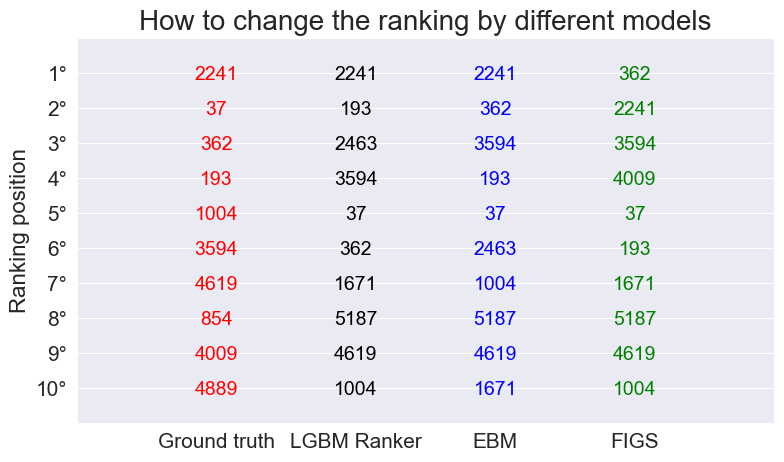

In [6]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(9, 5))

color = ["Red","Black","Blue","Green"]
for i, dt in enumerate([rank_w_score,rank_lgmb,rank_ebm,rank_figs]):
    for kId in dt.index:
        y = dt.loc[kId, "rank"] - 0.2
        x = dt.loc[kId, "ax"]
        axs.text(x, y, kId, horizontalalignment='center', size=14, color=color[i])
        
axs.set_xticks([-1, 0, 1, 2, 3, 4],["","Ground truth","LGBM Ranker","EBM","FIGS",""])
axs.set_yticks([*range(1,12)],[str(i)+"°" for i in range(10,0,-1)]+[""])
axs.tick_params(axis='both', labelsize=15)
axs.set_xlabel("")
axs.set_ylabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking by different models", fontsize=20)
axs.grid(axis='x')
plt.show()